In [23]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [27]:
def classify(features, labels):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
    classifier = SVC()
    pd.options.mode.copy_on_write = True

    classifier.fit(X_train, y_train)
    predicts = classifier.predict(X_val)

    print(classification_report(y_val, predicts))

In [26]:
# import kaggele dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# create data frame
df = pd.DataFrame(data)

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['Gender'] = lab.fit_transform(df['Gender'])
df['CALC'] = lab.fit_transform(df['CALC'])
df['CAEC'] = lab.fit_transform(df['CAEC'])
df['SCC'] = lab.fit_transform(df['SCC'])
df['FAVC'] = lab.fit_transform(df['FAVC'])
df['SMOKE'] = lab.fit_transform(df['SMOKE'])
df['family_history_with_overweight'] = lab.fit_transform(df['family_history_with_overweight'])
df['MTRANS'] = lab.fit_transform(df['MTRANS'])
df['NObeyesdad'] = lab.fit_transform(df['NObeyesdad'])


df.head()
target = df['NObeyesdad']
features = df.drop('NObeyesdad', axis=1)


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
classify(X_train, y_train, X_val, y_val)

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        56
           1       0.55      0.49      0.51        72
           2       0.45      0.38      0.41        63
           3       0.53      0.78      0.63        46
           4       0.73      0.54      0.62        74
           5       0.50      0.56      0.53        54
           6       0.44      0.49      0.46        57

    accuracy                           0.56       422
   macro avg       0.56      0.57      0.56       422
weighted avg       0.57      0.56      0.56       422



In [21]:
# import kaggele dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# create data frame
df = pd.DataFrame(data)

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['Gender'] = lab.fit_transform(df['Gender'])
df['CALC'] = lab.fit_transform(df['CALC'])
df['CAEC'] = lab.fit_transform(df['CAEC'])
df['SCC'] = lab.fit_transform(df['SCC'])
df['FAVC'] = lab.fit_transform(df['FAVC'])
df['SMOKE'] = lab.fit_transform(df['SMOKE'])
df['family_history_with_overweight'] = lab.fit_transform(df['family_history_with_overweight'])
df['MTRANS'] = lab.fit_transform(df['MTRANS'])
df['NObeyesdad'] = lab.fit_transform(df['NObeyesdad'])


target = df['NObeyesdad']
features = df.drop('NObeyesdad', axis=1)

In [22]:
#we import normalizer
from sklearn.preprocessing import MinMaxScaler
#initialize it
scaler = MinMaxScaler()
#calculate all the necessary data to perform the normalization
scaler.fit(features)
#apply the standarizer to the data
df_normalized = pd.DataFrame(scaler.transform(features),columns = features.columns)
df_normalized.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.219417,0.505921,0.474863,0.355120,0.756198,0.883941,0.709522,0.561876,0.045476,0.020843,0.504006,0.817622,0.336766,0.328933,0.619769,0.591307
std,0.135021,0.500083,0.176047,0.195457,0.171833,0.320371,0.266963,0.259346,0.208395,0.142893,0.306477,0.386247,0.283531,0.304464,0.156181,0.315356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.126536,0.000000,0.339623,0.197562,0.666667,1.000000,0.500000,0.552913,0.000000,0.000000,0.292406,1.000000,0.041502,0.000000,0.666667,0.750000
50%,0.186764,1.000000,0.472640,0.328358,0.666667,1.000000,0.692751,0.666667,0.000000,0.000000,0.500000,1.000000,0.333333,0.312675,0.666667,0.750000
75%,0.255319,1.000000,0.600875,0.510677,1.000000,1.000000,1.000000,0.666667,0.000000,0.000000,0.738710,1.000000,0.555559,0.500000,0.666667,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
classify(df_normalized, target)



              precision    recall  f1-score   support

           0       0.73      0.77      0.75        56
           1       0.66      0.54      0.60        72
           2       0.75      0.84      0.79        63
           3       0.86      0.93      0.90        46
           4       0.99      0.99      0.99        74
           5       0.61      0.70      0.66        54
           6       0.64      0.53      0.58        57

    accuracy                           0.76       422
   macro avg       0.75      0.76      0.75       422
weighted avg       0.75      0.76      0.75       422



<Axes: >

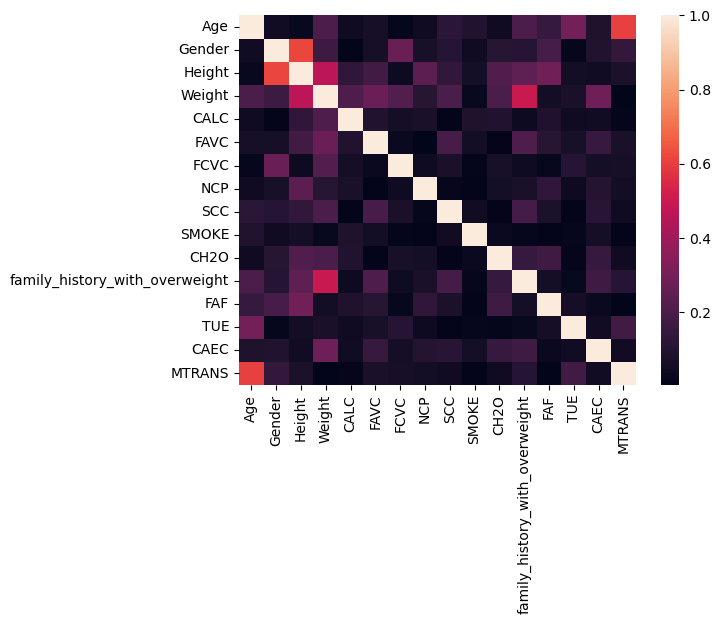

In [31]:
import seaborn as sns

sns.heatmap(abs(df_normalized.corr()))

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(features)

df_scaled = pd.DataFrame(x_scaled,columns = features.columns)
df_scaled.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
count,2111.000000,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03
mean,0.000000,-5.385449e-17,-5.385449e-16,-5.385449e-16,-5.048859e-17,1.346362e-16,-1.346362e-17,4.964711e-16,-6.731812e-17,-2.019544e-17,1.077090e-16,-8.078174e-17,2.692725e-17,-1.346362e-17,1.884907e-16,-7.404993e-17
std,1.000237,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00
min,-1.625448,-1.011914e+00,-2.698006e+00,-1.817304e+00,-4.401822e+00,-2.759769e+00,-2.658379e+00,-2.167023e+00,-2.182720e-01,-1.459003e-01,-1.644905e+00,-2.117337e+00,-1.188039e+00,-1.080625e+00,-3.969213e+00,-1.875493e+00
25%,-0.688066,-1.011914e+00,-7.683883e-01,-8.062914e-01,-5.211595e-01,3.623491e-01,-7.850187e-01,-3.456952e-02,-2.182720e-01,-1.459003e-01,-6.905894e-01,4.722913e-01,-1.041630e+00,-1.080625e+00,3.003456e-01,5.033367e-01
50%,-0.241897,9.882266e-01,-1.263207e-02,-1.369510e-01,-5.211595e-01,3.623491e-01,-6.283450e-02,4.041527e-01,-2.182720e-01,-1.459003e-01,-1.307326e-02,4.722913e-01,-1.210937e-02,-5.341135e-02,3.003456e-01,5.033367e-01
75%,0.265964,9.882266e-01,7.159595e-01,7.960531e-01,1.419172e+00,3.623491e-01,1.088342e+00,4.041527e-01,-2.182720e-01,-1.459003e-01,7.659959e-01,4.722913e-01,7.718565e-01,5.619968e-01,3.003456e-01,5.033367e-01
max,5.782584,9.882266e-01,2.983646e+00,3.300136e+00,1.419172e+00,3.623491e-01,1.088342e+00,1.689740e+00,4.581439e+00,6.853997e+00,1.618759e+00,4.722913e-01,2.339750e+00,2.204618e+00,2.435125e+00,1.296280e+00


In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=14)
x_pca = pca.fit_transform(x_scaled)
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)


[0.16278132 0.11654264 0.09558839 0.08480334 0.07033629 0.06665355
 0.06135247 0.05444052 0.05120547 0.04925825 0.04743343 0.04287739
 0.03756736 0.02504009]


0.9658805097401661

In [49]:
after_extration_df = pd.DataFrame(x_pca,columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'])
classify(after_extration_df, target)

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        56
           1       0.67      0.68      0.68        72
           2       0.83      0.79      0.81        63
           3       0.86      0.96      0.91        46
           4       1.00      0.99      0.99        74
           5       0.73      0.74      0.73        54
           6       0.71      0.61      0.66        57

    accuracy                           0.80       422
   macro avg       0.80      0.80      0.80       422
weighted avg       0.80      0.80      0.80       422

